<a href="https://colab.research.google.com/github/AbhaySingh71/machine_learning-for-ds-/blob/main/feature%20engineering/feature%20extraction/t_SNE_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T-distributed Stochastic Neighbor Embedding (t-SNE) Algorithm

T-distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions.

## What is Dimensionality Reduction?
Dimensionality Reduction represents n-dimensional data (multidimensional data with many features) in 2 or 3 dimensions.

An example of dimensionality reduction can be discussed as a classification problem, i.e., whether a student will play football or not, which relies on both temperature and humidity. These features are correlated to a high degree, so we can reduce the number of features. A 3-D classification problem can be hard to visualize, whereas a 2-D one can be mapped to a simple 2-dimensional space, and a 1-D problem to a simple line.

## What is the t-SNE Algorithm?
t-Distributed Stochastic Neighbor Embedding is a dimensionality reduction technique. This algorithm uses a randomized approach to reduce the dimensionality of the dataset non-linearly, focusing on retaining the local structure of the dataset in the lower dimension.

By mapping high-dimensional data into lower dimensions, we can explore the data by visualizing it in 2D or 3D, while retaining the local structure.

## What is the difference between PCA and t-SNE?
Both PCA and t-SNE are unsupervised algorithms used for dimensionality reduction. However, PCA is deterministic, whereas t-SNE is a randomized, nonlinear method.

t-SNE is primarily used for visualization purposes and is not affected by outliers, while PCA is highly affected by them. The methodologies differ: PCA preserves the variance in the data, while t-SNE focuses on retaining the local structure.

## How does t-SNE work?
t-SNE, a non-linear dimensionality reduction algorithm, finds patterns in the data based on the similarity of data points. The similarity of points is calculated as the conditional probability that point A would choose point B as its neighbor.

The algorithm minimizes the difference between these conditional probabilities (or similarities) in higher-dimensional and lower-dimensional space to represent data points in the lower-dimensional space accurately.

## Space and Time Complexity
The t-SNE algorithm computes pairwise conditional probabilities and minimizes the sum of the differences between the probabilities in higher and lower dimensions. This involves a lot of calculations and is computationally expensive. t-SNE has a quadratic time and space complexity in the number of data points.

## Python Code Implementation of t-SNE on MNIST Dataset
Now let’s use the sklearn implementation of the t-SNE algorithm on the MNIST dataset, which contains 10 classes corresponding to the 10 different digits in mathematics.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/mnist_train[1].csv')

# print first five rows of df
print(df.head(4))

# save the labels into a variable l.
l = df['label']

# Drop the label feature and
# store the pixel data in d.
d = df.drop("label", axis=1)

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
1      0    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
2      4    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   
3      1    0    0    0    0    0    0    0    0    0  ...    0.0    0.0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[4 rows x 785 columns]


## Before applying the t-SNE algorithm on the dataset we must standardize the data. As we know that the t-SNE algorithm is a complex algorithm which utilizes some comples non-linear methodologies to map the high dimensional data the lower dimensional it help us save some of the time complexity that will be needed to complete the process of reduction.

In [5]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)


(14895, 784)


## Now let’s reduce the 784 columns data to 2 dimensions so, that we can create a scatter plot to visualize the same.

(14895, 784)


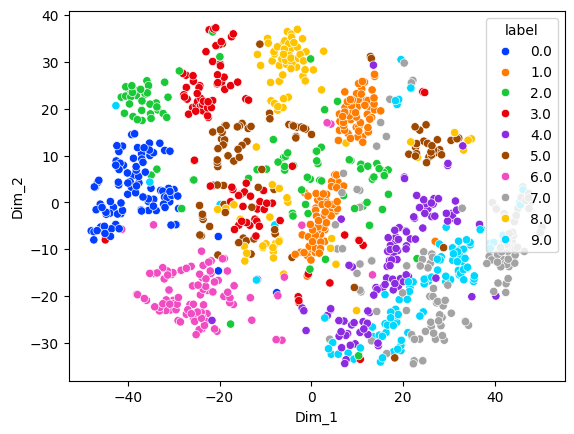

In [8]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
data_1000 = standardized_data[0:1000, :]
# Assign 'l' to 'labels' to fix the NameError
labels = l
labels_1000 = labels[0:1000]

# Import necessary libraries
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE # Importing TSNE
import numpy as np
import pandas as pd


model = TSNE(n_components = 2, random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

tsne_data = model.fit_transform(data_1000)

# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
	columns =("Dim_1", "Dim_2", "label"))

# Plotting the result of tsne
sn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
			hue='label', palette="bright")
plt.show()